In [1]:
#4章　ディープニューラルネットワーク
import tensorflow as tf
import keras
import numpy as np
import theano
import theano.tensor as T
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from matplotlib import pylab as plt
import matplotlib.cm as cm

Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\hfuis\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#MNIST：0～9の手書き画像データ
#枚数：55,000枚
#解像度：28*28(=784)
#PC:corei5,RAM 8GB

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X = mnist.train.images
Y = mnist.train.labels
print(X.shape)
print(Y.shape)

(55000, 784)
(55000, 10)


In [4]:
n = X.shape[0] #画像の枚数
N = 5000 #モデルの学習及び評価で使う枚数
C = Y.shape[1] #クラス数（分類）
indices = np.random.permutation(range(n))[:N] #ランダムにN枚選択。

X_N = X[indices]
Y_N = Y[indices]

#train:test = 8:2でランダムに分割。
X_train, X_test, Y_train, Y_test = train_test_split(X_N, Y_N, train_size = 0.8) 

feature_size = X_N.shape[1] #特徴量の大きさ
neuron_size = 200 #隠れ層のニューロンの数

C:\Users\hfuis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


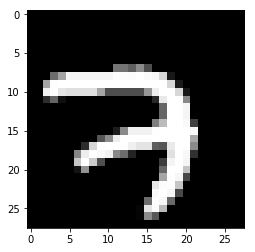

In [5]:
# ndarrayをgrayscaleの画像として表示
plt.imshow(X[0].reshape(28, 28), cmap = cm.Greys_r)

In [6]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [7]:
#ニューラルネットワーク下準備(3層)
x = tf.placeholder(tf.float32, shape = [None, feature_size]) #入力データ
t = tf.placeholder(tf.float32, shape = [None, C]) #正解の出力(教師)

#入力層-隠れ層
#入力は2次元(重みWは特徴量×ニューロン数)、bはバイアス(ニューロン数×1)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
W = weight_variable([feature_size, neuron_size])
b = bias_variable([neuron_size])
h = tf.nn.relu(tf.matmul(x, W) + b)            #モデルの出力

#隠れ層-出力層
#入力は2次元(重みVはニューロン数×1)、bはバイアス(scalar)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
V = weight_variable([neuron_size, C])
c = bias_variable([C])
y = tf.nn.softmax(tf.matmul(h, V) + c)            #モデルの出力

#交差エントロピー誤差関数(目的関数)
#最小化させることで予想を行う。
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices = [1]))

#目的関数の偏微分と勾配降下法
#最小化させることで予想を行う。
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) 
#0.1は学習率

#modelの予測yと教師tが一致しているか(bool値)
#argmax:一番高い確率を返す。
correct_prediction = tf.equal(tf.argmax(y, axis = 1), tf.argmax(t, axis = 1))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
%%time
#モデルの学習
#データの学習実行(勾配降下法)

#変数(tf.Variable)の初期化
init = tf.global_variables_initializer()
#セッション(計算グラフ(学習)の実行環境)
sess = tf.Session()
#変数初期化の実行
sess.run(init)

epochs = 10000 #エポック数
for epoch in range(epochs): #gradで足し合わせする回数
    sess.run(train_step, feed_dict = {
        x: X_train,
        t: Y_train
    })
    if epoch % 1000 == 0:
        print("epoch:", epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
epoch: 4000
epoch: 5000
epoch: 6000
epoch: 7000
epoch: 8000
epoch: 9000
Wall time: 9min 36s


In [9]:
#モデルの評価

accuracy = correct_prediction.eval(session = sess, feed_dict = {
    x: X_test,
    t: Y_test
})

print("accuracy: ", accuracy.mean())

accuracy:  0.941


In [10]:
#入力（X)を食わせた時の出力
prob = y.eval(session = sess, feed_dict = {
    x: X_test
})

print("output probability:")
print(prob[0:15])

output probability:
[[3.27294970e-07 1.87010745e-08 4.99438283e-06 5.41065162e-07
  3.28583360e-06 1.20494351e-05 9.99975681e-01 4.60149193e-12
  3.11481790e-06 1.68868447e-10]
 [2.45236276e-09 2.82531524e-15 1.47525984e-11 2.81772117e-08
  9.68345955e-13 1.00000000e+00 1.21417186e-13 4.24033281e-10
  4.79432138e-08 1.22185530e-12]
 [8.13125456e-15 9.99958634e-01 2.03915929e-09 2.10437302e-05
  5.80466841e-10 1.15079359e-08 3.18444542e-11 4.93193767e-12
  1.98733633e-05 3.61472587e-07]
 [4.51815418e-10 1.25430312e-15 1.22995357e-15 1.92337856e-12
  9.99998569e-01 1.42781346e-06 3.84775589e-09 1.36326603e-08
  7.23647461e-11 5.29875130e-08]
 [1.36629744e-11 1.94662845e-11 5.38978639e-09 2.78628636e-06
  5.42867274e-05 1.52970870e-06 3.12945503e-11 4.55068493e-06
  5.02425537e-05 9.99886632e-01]
 [4.92150487e-11 1.44010548e-09 9.99999642e-01 6.46942837e-08
  1.14536398e-08 2.94170348e-11 1.32139411e-09 2.57903057e-16
  2.62330644e-07 5.58981098e-14]
 [2.78068999e-08 7.25763589e-02 5.9189